In [109]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import animation

%matplotlib inline

### Control equation

$$ \frac{\partial^2 u}{\partial t^2} = \frac{E}{\rho}  \frac{\partial^2 u}{\partial x^2} $$

$$ a^2 = \frac{E}{\rho} $$

We assume that:
$$ u(x,t) = U(x)T(x) $$

$$ \frac{\partial^2 u}{\partial t^2} = U(x)\ddot T(t) $$

$$ \frac{\partial^2 u}{\partial x^2} = \ddot U (x)T(t) $$

We could get the ordinary differential equations:

$$ U(x)\ddot T(t) = a^2\ddot U (x)T(t) $$

$$ \frac{\ddot T(t)}{T(t)} = a^2 \frac{\ddot U(x)}{U(x)} = -\omega^2 $$

Then:

$$ \ddot T(t) + \omega^2 T(t)= 0 $$

$$ \ddot U(x) + (\frac{\omega}{a})^2U(x) = 0 $$

In [110]:
#Input constants 

delta_t = 0.002 # time step size (seconds)
t_max = 20 # max sim time (seconds)
n = int(t_max/delta_t)
T1_0 = 0 # initial angle (radians)
T2_0 = -1 # initial angular velocity (rad/s)
T_init = (T1_0, T2_0)
U1_0 = 0
U2_0 = 1
U_init = (U1_0, U2_0)
# Get timesteps
t = np.linspace(0, t_max, n)
x = np.linspace(0, 5)

In [111]:
def model1(T_init, t, omega = 1):
    T_dot_1 = T_init[1]
    T_dot_2 = - omega**2 * T_init[0]
    return T_dot_1, T_dot_2
def model2(U_init, x, omega = 1, a = 1):
    U_dot_1 = U_init[1]
    U_dot_2 = - (omega/a)**2 * U_init[0]
    return U_dot_1, U_dot_2

In [112]:
T = integrate.odeint(model1, T_init, t)
U = integrate.odeint(model2, U_init, x)

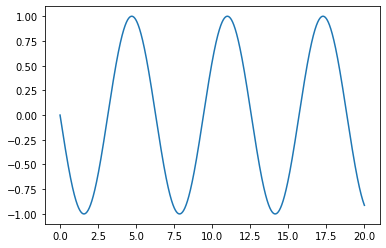

In [113]:
plt.plot(t, T[:, 0])

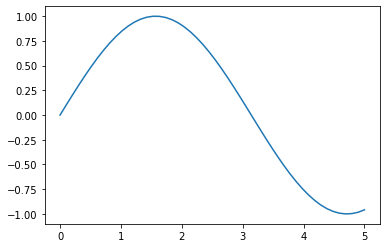

In [114]:
plt.plot(x, U[:, 0])

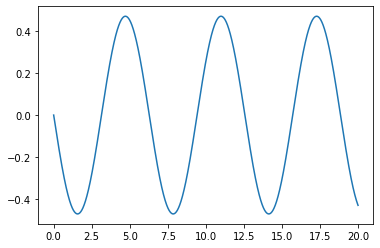

In [115]:
w = U[:, 0]
w[26]
r = w[26] * T[:, 0]
plot(t, r)

In [116]:
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
%pylab


# 创建画布，包含2个子图
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

# 确定要画的函数
m = U[:, 0]
k = T[:, 0]


line, = ax.plot(x, m, 'r-', linewidth = 5) 

n = list(k)

def init():
    line.set_ydata(m*n[1])
    label = 'timestep {0}'.format(0)
    ax.set_xlabel(label)
    return line,ax  

def animate(i):
    line.set_ydata(m * n[i])

    return line,ax

ani = animation.FuncAnimation(fig=fig,
                              func=animate,
                              frames=1000,
                              init_func=init,
                              interval=20,
                              blit=True)
plt.show()

Using matplotlib backend: GTK3Agg
Populating the interactive namespace from numpy and matplotlib
